Run the cell below if you are using Google Colab to mount your Google Drive in your Colab instance. Adjust the path to the files in your Google Drive as needed if it differs.

If you do not use Google Colab, running the cell will simply do nothing, so do not worry about it.

In [1]:
try:
    from google.colab import drive
    drive.mount('/content/drive/')
    %cd 'drive/My Drive/Colab Notebooks/07_TextMining'
except ImportError as e:
    pass

## Exercise 7: Text Mining

### 7.1. Which documents are similar?

#### 7.1.1. The file documents.zip is provided in ILIAS and contains three corpora. Load and vectorize the 4-documents corpus using the load_files function. How many different attributes has the generated example set?

In [2]:
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import pandas as pd

corpus_4_docs = load_files('DataSetEx7', categories=['corpus-4docs'], encoding='utf-8')

vectorizer = CountVectorizer()
count_matrix = vectorizer.fit_transform(corpus_4_docs.data)

df = pd.DataFrame(count_matrix.toarray(), columns=vectorizer.get_feature_names())
display(df)

,000,10,100,15,1881,19,1960s,2008,25,26,...,yeah,years,yet,yohan,yorkshire,youth,zagreb,zlatan,zone,ángel
0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1,1,0,0,0,1,1,0,0,1,0,...,1,2,1,0,0,1,1,1,0,0
2,0,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
3,0,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


Answer: 947 attributes

#### 7.1.2.	Examine the generated word list. What are the most common words? Look for the three most common words that might be helpful for text mining tasks!

In [3]:
import pandas as pd

def generate_word_list(X, Y, feature_names, target_names):
    d = pd.DataFrame(X.toarray(), columns=feature_names)
    doc = d[ d>0 ].count()
    d = d.assign(target=Y)
    d = d.groupby(by='target').sum()
    d = d.transpose()
    d.columns = target_names
    total = d.sum(axis=1)
    d = d.assign(total_occurrences=total)
    d = d.assign(document_occurrences=doc)
    d = d.sort_values(by='total_occurrences', ascending=False)
    return d

In [4]:
word_list = generate_word_list(count_matrix, corpus_4_docs.target, vectorizer.get_feature_names(), corpus_4_docs.target_names)
display(word_list)

,corpus-4docs,total_occurrences,document_occurrences
the,151,151,4
of,68,68,4
and,61,61,4
in,60,60,4
to,60,60,4
...,...,...,...
heavily,1,1,1
hebden,1,1,1
held,1,1,1
help,1,1,1


Answer: It’s hard to find the most common word which would help to mine the text because the top words are so called stopwords. At position 30 you can find Madrid followed by United which may indicate a football game. At position 46 League is listed which underlines the first conclusion.

##### 7.1.3. Remove stopwords and apply the porter stemmer. By how many attributes do the operators reduce the size of your example set?

In [5]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
import re, string

stemmer = PorterStemmer()
token_pattern = re.compile(r"(?u)\b\w\w+\b")
my_stopwords = set(stopwords.words('english'))

def tokenize(text):
    stems = []
    tokens = token_pattern.findall(text)
    for item in tokens:
        if item not in my_stopwords:
            stems.append(stemmer.stem(item))
    return stems

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ralph\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
vectorizer = CountVectorizer(tokenizer=tokenize)
count_matrix = vectorizer.fit_transform(corpus_4_docs.data)

word_list = generate_word_list(count_matrix, corpus_4_docs.target, vectorizer.get_feature_names(), corpus_4_docs.target_names)
display(word_list)

,corpus-4docs,total_occurrences,document_occurrences
peopl,19,19,2
game,10,10,2
two,10,10,3
local,9,9,1
leagu,9,9,2
...,...,...,...
goalkeep,1,1,1
gonzalo,1,1,1
good,1,1,1
got,1,1,1


Answer: Number of attributes is reduced to 778 attributes.

#### 7.1.4.	Compute the cosine similarity on TF-IDF vectors between the documents with the cosine_similarity function. Which documents are most similar? Can you confirm the judgment of the algorithm by reading the documents?

In [7]:
from sklearn.metrics.pairwise import cosine_similarity
import os

vectorizer = TfidfVectorizer(tokenizer=tokenize)
vectors = vectorizer.fit_transform(corpus_4_docs.data)

names = [ "[{}] {}".format(i, os.path.basename(f)) for i, f in enumerate(corpus_4_docs.filenames) ]
sim = pd.DataFrame(cosine_similarity(vectors), columns=names, index=names)
display(sim)

,[0] doc3.txt,[1] doc4.txt,[2] doc2.txt,[3] doc1.txt
[0] doc3.txt,1.000000,0.071657,0.036113,0.054501
[1] doc4.txt,0.071657,1.000000,0.218427,0.037516
[2] doc2.txt,0.036113,0.218427,1.000000,0.023157
[3] doc1.txt,0.054501,0.037516,0.023157,1.000000


In [8]:
print(corpus_4_docs.data[1][:500])
print('\n==================\n')
print(corpus_4_docs.data[2][:500])

Málaga vs. Real Madrid Barcelona vs. Sevilla 

It cannot often be said that Barcelona and Madrid are the warm-up act. But from the perspective of world television this weekend, the mighty Spanish teams will have to go some to come close to the shootout Sunday between the Manchester clubs in England. 
Barça is still, game on game, playing the most beautiful soccer on earth. And Sevilla is one of the opponents that might dare to attack it in Camp Nou. 
Real, however, has the more intriguing ch


Real Madrid Slips Into First With a Hat Trick by Ronaldo


Barcelona was held to a scoreless tie by visiting Sevilla on Saturday, letting Real Madrid take the overnight lead in the Spanish league when Cristiano Ronaldo scored three goals in 15 first-half minutes in a 4-0 rout at Malaga. 
The Times's soccer blog has the world's game covered from all angles.
Go to the Goal Blog 
Barcelona looked set to snatch a victory in injury time when Andrés Iniesta was fouled in the penalty area, but Se


#### 7.1.5.	Experiment with different similarity metrics as well as with different vector creation methods. Which combination produces the best similarity scores? 

for different pairwise distances you can use the [pairwise_distances function](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html)

In [9]:
from sklearn.metrics.pairwise import *
from sklearn.feature_extraction.text import *

# create different vectorizers
tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenize)
tf_vectorizer = TfidfVectorizer(use_idf=False, tokenizer=tokenize)
to_vectorizer = CountVectorizer(tokenizer=tokenize)
bto_vectorizer = CountVectorizer(binary=True, tokenizer=tokenize)

# calcualte the features
binary_features = bto_vectorizer.fit_transform(corpus_4_docs.data).astype(bool)
term_occurrence_features = to_vectorizer.fit_transform(corpus_4_docs.data)
term_frequency_features = tf_vectorizer.fit_transform(corpus_4_docs.data)
tfidf_features = tfidf_vectorizer.fit_transform(corpus_4_docs.data)
features = [ 
    ('binary term occurrences', binary_features.toarray()),
    ('term occurrences', term_occurrence_features.toarray()),
    ('term frequencies', term_frequency_features.toarray()),
    ('TF-IDF', tfidf_features.toarray())
           ]

# similarity/distance functions
sim = [ ('Euclidean Distance', euclidean_distances), ('Cosine Similarity', cosine_similarity) ]

print("Jaccard distance (binary term occurrences):")
distance = pairwise_distances(binary_features.toarray(), metric='jaccard')
df = pd.DataFrame(distance, columns=names, index=names)
display(df)

for sim_name, sim_func in sim:
    for feature_name, feature in features:
        print("{} ({}):".format(sim_name, feature_name))
        distance = sim_func(feature)
        df = pd.DataFrame(distance, columns=names, index=names)
        display(df)

Jaccard distance (binary term occurrences):


,[0] doc3.txt,[1] doc4.txt,[2] doc2.txt,[3] doc1.txt
[0] doc3.txt,0.000000,0.921191,0.950617,0.943114
[1] doc4.txt,0.921191,0.000000,0.901544,0.960251
[2] doc2.txt,0.950617,0.901544,0.000000,0.962712
[3] doc1.txt,0.943114,0.960251,0.962712,0.000000


Euclidean Distance (binary term occurrences):


,[0] doc3.txt,[1] doc4.txt,[2] doc2.txt,[3] doc1.txt
[0] doc3.txt,0.000000,22.934690,19.621417,17.748239
[1] doc4.txt,22.934690,0.000000,21.610183,21.424285
[2] doc2.txt,19.621417,21.610183,0.000000,16.852300
[3] doc1.txt,17.748239,21.424285,16.852300,0.000000


Euclidean Distance (term occurrences):


,[0] doc3.txt,[1] doc4.txt,[2] doc2.txt,[3] doc1.txt
[0] doc3.txt,0.000000,44.474712,38.275318,36.193922
[1] doc4.txt,44.474712,0.000000,34.044089,37.255872
[2] doc2.txt,38.275318,34.044089,0.000000,27.766887
[3] doc1.txt,36.193922,37.255872,27.766887,0.000000


Euclidean Distance (term frequencies):


,[0] doc3.txt,[1] doc4.txt,[2] doc2.txt,[3] doc1.txt
[0] doc3.txt,0.000000,1.336691,1.369094,1.354813
[1] doc4.txt,1.336691,0.000000,1.176883,1.369536
[2] doc2.txt,1.369094,1.176883,0.000000,1.383504
[3] doc1.txt,1.354813,1.369536,1.383504,0.000000


Euclidean Distance (TF-IDF):


,[0] doc3.txt,[1] doc4.txt,[2] doc2.txt,[3] doc1.txt
[0] doc3.txt,0.000000,1.362603,1.388443,1.375136
[1] doc4.txt,1.362603,0.000000,1.250259,1.387432
[2] doc2.txt,1.388443,1.250259,0.000000,1.397743
[3] doc1.txt,1.375136,1.387432,1.397743,0.000000


Cosine Similarity (binary term occurrences):


,[0] doc3.txt,[1] doc4.txt,[2] doc2.txt,[3] doc1.txt
[0] doc3.txt,1.000000,0.150267,0.094698,0.114342
[1] doc4.txt,0.150267,1.000000,0.190304,0.090109
[2] doc2.txt,0.094698,0.190304,1.000000,0.073972
[3] doc1.txt,0.114342,0.090109,0.073972,1.000000


Cosine Similarity (term occurrences):


,[0] doc3.txt,[1] doc4.txt,[2] doc2.txt,[3] doc1.txt
[0] doc3.txt,1.000000,0.106629,0.062791,0.082241
[1] doc4.txt,0.106629,1.000000,0.307473,0.062185
[2] doc2.txt,0.062791,0.307473,1.000000,0.042958
[3] doc1.txt,0.082241,0.062185,0.042958,1.000000


Cosine Similarity (term frequencies):


,[0] doc3.txt,[1] doc4.txt,[2] doc2.txt,[3] doc1.txt
[0] doc3.txt,1.000000,0.106629,0.062791,0.082241
[1] doc4.txt,0.106629,1.000000,0.307473,0.062185
[2] doc2.txt,0.062791,0.307473,1.000000,0.042958
[3] doc1.txt,0.082241,0.062185,0.042958,1.000000


Cosine Similarity (TF-IDF):


,[0] doc3.txt,[1] doc4.txt,[2] doc2.txt,[3] doc1.txt
[0] doc3.txt,1.000000,0.071657,0.036113,0.054501
[1] doc4.txt,0.071657,1.000000,0.218427,0.037516
[2] doc2.txt,0.036113,0.218427,1.000000,0.023157
[3] doc1.txt,0.054501,0.037516,0.023157,1.000000


## 7.2.1 Learn a Classifier for the 300-Documents Corpus
The 300-documents corpus contains postings from three different news groups. Vectorize
the 300-documents corpus and learn a classifier for classifying the postings. Evaluate the
classifier using 10-fold X-Validation. Which accuracy does your classifier reach? Increase the
performance of your classifier by pruning the document vectors.

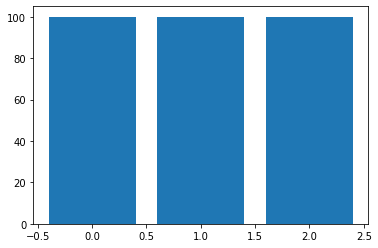

In [10]:
import matplotlib.pyplot as plt

corpus_300_docs = load_files('DataSetEx7/corpus-300docs',encoding='utf-8')

class_dist = pd.Series(corpus_300_docs.target).value_counts()
plt.bar(class_dist.index, class_dist)
plt.show()

In [11]:
count_vectorizer = CountVectorizer(tokenizer=tokenize)
count_matrix = count_vectorizer.fit_transform(corpus_300_docs.data)

word_list = generate_word_list(count_matrix, corpus_300_docs.target, count_vectorizer.get_feature_names(), corpus_300_docs.target_names)
display(word_list.sort_values(by='document_occurrences', ascending=False))

,misc.forsale,rec.sport.baseball,rec.sport.hockey,total_occurrences,document_occurrences
edu,839,854,717,2410,300
cantaloup,131,103,100,334,300
cmu,256,173,250,679,300
id,101,100,100,301,300
date,101,102,101,304,300
...,...,...,...,...,...
27990,0,1,0,1,1
rodriguez,0,1,0,1,1
3ce6f700,1,0,0,1,1
rodney,1,0,0,1,1


First, we create a baseline model with all features:

In [12]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression

vectorizer_300_docs = TfidfVectorizer(tokenizer=tokenize)
tfidf_matrix_300_docs = vectorizer_300_docs.fit_transform(corpus_300_docs.data)

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

cross_val_acc = cross_val_score(LogisticRegression(), tfidf_matrix_300_docs.toarray(), corpus_300_docs.target, scoring='accuracy', cv=cv)
print(cross_val_acc.mean())

0.8566666666666666


Then, we test different pruning approaches:

In [13]:
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([ ('vectorizer', vectorizer_300_docs), ('estimator', LogisticRegression()) ])
parameters = {
    'vectorizer': [CountVectorizer(tokenizer=tokenize, binary=True), CountVectorizer(tokenizer=tokenize), TfidfVectorizer(tokenizer=tokenize)],
    'vectorizer__min_df' : [0, 10, 20],
    'vectorizer__max_df' : [90, 110, 130],
}

nested_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

search = GridSearchCV(pipeline, parameters, cv=nested_cv, n_jobs=-1)
accuracy = cross_val_score(search, corpus_300_docs.data, corpus_300_docs.target, scoring='accuracy', cv=cv)

print("Optimal cross-validated accuracy: {}".format(accuracy.mean()))

Optimal cross-validated accuracy: 0.9166666666666666


#### 7.2.2 Try to do the same classification as in 7.2.1 using word2vec embeddings. You can aggregate word embeddings to get a document representation by applying mean pooling (elementwise average of word vectors).

In [14]:
# this will download the model (which is 1.3 GB huge) - to change the target folder, execute the following two lines
# import os
# os.environ["GENSIM_DATA_DIR"] = "C:/cache"

import gensim.downloader
word2vec_model = gensim.downloader.load('word2vec-google-news-300')

In [15]:
from sklearn.base import TransformerMixin, BaseEstimator

class Word2VecVectorizer(BaseEstimator, TransformerMixin):
    
    def __init__(self, model, tokenizer):
        self.model = model
        self.tokenizer = tokenizer
    
    def transform(self, X):
        return_matrix = []
        for doc in X:
            mean_vector = np.zeros(self.model.vector_size)
            count = 0
            for word in self.tokenizer(doc):    
                try:
                    word_vector = self.model[word]
                except KeyError as e:
                    continue
                count += 1
                mean_vector = np.add(mean_vector, word_vector)

            return_matrix.append(mean_vector)
        return np.array(return_matrix)

    def fit(self, X, y=None, **fit_params):
        return self

word2vec_vectorizer = Word2VecVectorizer(model=word2vec_model, tokenizer=tokenize)

pipeline = Pipeline([ ('vectorizer', word2vec_vectorizer), ('estimator', LogisticRegression()) ])

accuracy = cross_val_score(pipeline, corpus_300_docs.data, corpus_300_docs.target, scoring='accuracy', cv=cv)
display(accuracy)
display(accuracy.mean())

C:\tools\Anaconda3\envs\dm1\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\tools\Anaconda3\envs\dm1\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

array([0.83, 0.83, 0.9 ])

0.8533333333333334

#### 7.2.3 Now do the same using BERT embeddings from the huggingface library. Experiment with mean pooling as well as using the [CLS] token representation as document representations.

In [16]:
import torch
from transformers import AutoTokenizer, AutoModel

class BertVectorizer(BaseEstimator, TransformerMixin):
    
    def __init__(self, model, tokenizer, use_cls=False):
        self.model = model
        self.tokenizer = tokenizer
        self.use_cls = use_cls
    
    def bert_mean_pooling(self, model_output, attention_mask):
        token_embeddings = model_output[0] #First element of model_output contains all token embeddings
        input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
        return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

    def transform(self, X):
        
        return_matrix = []
        
        for doc in X:
            tokenized = self.tokenizer(doc, padding=True, truncation=True, max_length=512, return_tensors='pt')
            
            self.model.eval()
            with torch.no_grad():
                output = self.model(tokenized['input_ids'])
            if self.use_cls:
                return_matrix.append(output[1].squeeze(0).numpy())
            else:
                mean_pooled = self.bert_mean_pooling(output, tokenized['attention_mask'])
                return_matrix.append(mean_pooled.squeeze(0).numpy())
            
        return np.array(return_matrix)

    def fit(self, X, y=None, **fit_params):
        return self

bert_model = AutoModel.from_pretrained('huawei-noah/TinyBERT_General_4L_312D')
bert_tokenizer = AutoTokenizer.from_pretrained('huawei-noah/TinyBERT_General_4L_312D')

bert_vectorizer = BertVectorizer(model=bert_model, tokenizer=bert_tokenizer, use_cls=False)

pipeline = Pipeline([ ('vectorizer', bert_vectorizer), ('estimator', LogisticRegression()) ])

accuracy = cross_val_score(pipeline, corpus_300_docs.data, corpus_300_docs.target, scoring='accuracy', cv=cv)
display(accuracy)
display(accuracy.mean())

Some weights of the model checkpoint at huawei-noah/TinyBERT_General_4L_312D were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'fit_denses.2.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'fit_denses.4.bias', 'fit_denses.0.bias', 'fit_denses.2.weight', 'fit_denses.3.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'fit_denses.0.weight', 'cls.predictions.transform.LayerNorm.bias', 'fit_denses.1.weight', 'cls.seq_relationship.bias', 'fit_denses.4.weight', 'cls.predictions.decoder.weight', 'fit_denses.3.weight', 'fit_denses.1.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing

array([0.72, 0.67, 0.64])

0.6766666666666667

### 7.3. Learn a Classifier for the Job Postings
#### 7.3.1.	The Job Postings corpus contains 500 descriptions of open positions belonging to 30 different job categories. The corpus is provided as an Excel file in ILIAS. Vectorize the corpus  and learn a Naïve Bayes classifier for classifying the job adds. Evaluate the classifying using 10-fold X-Validation. Analyze the classifier performance and the word list. What do you discover? 

In [17]:
import pandas as pd
job_postings = pd.read_excel('DataSetEx7/JobPostings.xls')
job_postings.head()

,Category,JobText
0,customer service,OGPlanet (www.ogplanet.com) is an online game ...
1,customer service,Our company is right now looking for a full-ti...
2,customer service,<br>\nARE YOU READY TO TAKE YOUR CAREER TO THE...
3,customer service,"Due to rapid growth, we currently have several..."
4,customer service,<br>\nOur growing coffee company is looking fo...


In [18]:
job_postings_target = job_postings['Category']
job_postings_data = job_postings['JobText']

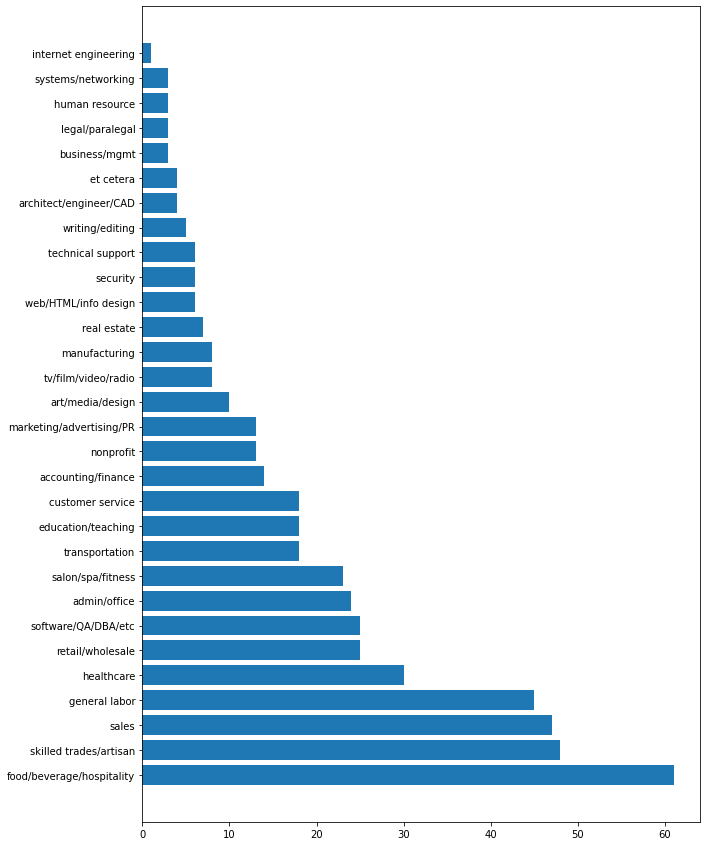

In [19]:
import matplotlib.pyplot as plt

class_distribution = pd.Series(job_postings_target).value_counts()

plt.figure(figsize=(10,15))
plt.barh(class_distribution.index, class_distribution)
plt.show()

In [20]:
count_vectorizer = CountVectorizer(tokenizer=tokenize)
count_matrix = count_vectorizer.fit_transform(job_postings_data)

word_list = generate_word_list(count_matrix, job_postings_target, count_vectorizer.get_feature_names(), job_postings_target.unique())
display(word_list)

,customer service,food/beverage/hospitality,healthcare,general labor,marketing/advertising/PR,art/media/design,manufacturing,nonprofit,admin/office,retail/wholesale,...,architect/engineer/CAD,legal/paralegal,human resource,systems/networking,security,internet engineering,web/HTML/info design,writing/editing,total_occurrences,document_occurrences
br,251,379,79,193,17,324,285,39,590,555,...,415,516,66,107,136,69,148,46,7162,432
work,22,37,2,26,1,34,22,1,67,75,...,59,46,10,4,13,6,19,5,687,296
experi,18,22,12,17,1,19,19,0,48,43,...,39,83,6,7,15,7,11,4,579,280
pleas,14,17,2,10,1,12,15,3,48,33,...,43,23,4,4,6,3,5,2,396,308
requir,13,26,2,12,1,16,14,2,29,26,...,25,41,6,5,10,8,5,1,356,202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lighter,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
lightroom,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
lightsheer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
aborigin,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


Within the wordlist are some HTML fragments which might be
good to be filtered. Also the data set has a low number of text descriptions per class which
might not be enough to learn a good classifier.

#### 7.3.2 Experiment with different vector creation and pruning methods as well as different types of classifiers in order to increase the performance. What is highest accuracy that you can reach? Which problem concerning precision and recall does remain?

In [21]:
pipeline = Pipeline([ ('vectorizer', TfidfVectorizer(tokenizer=tokenize)), ('estimator', LogisticRegression()) ])
accuracy = cross_val_score(pipeline, job_postings_data, job_postings_target, cv=cv, n_jobs=-1)
print("Baseline cross-validated accuracy: {}".format(accuracy.mean()))

C:\tools\Anaconda3\envs\dm1\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


Baseline cross-validated accuracy: 0.3806844143039223


In [ ]:
from sklearn.tree import DecisionTreeClassifier

pipeline = Pipeline([ ('vectorizer', None), ('estimator', None) ])
params = {
    'vectorizer': [CountVectorizer(tokenizer=tokenize, binary=True), CountVectorizer(tokenizer=tokenize), TfidfVectorizer(tokenizer=tokenize)],
    'vectorizer__min_df': [1, 10],
    'vectorizer__max_df': [0.5, 0.8, 1.0],
    'estimator': [LogisticRegression(), DecisionTreeClassifier()]
}

search = GridSearchCV(pipeline, params, cv=nested_cv, scoring='accuracy')

accuracy = cross_val_score(search, job_postings_data, job_postings_target, cv=cv, n_jobs=-1)
print("Optimal cross-validated accuracy: {}".format(accuracy.mean()))

C:\tools\Anaconda3\envs\dm1\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
